<a href="https://colab.research.google.com/github/MrMayank28/Road_Network_Extraction_from_Satellite_Imagery/blob/main/Copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !ls -lah "/content/drive/MyDrive/Satellite_Data"

In [3]:
# %cd /content/drive/MyDrive/Satellite_Data/DataSet

In [4]:
# !unzip train.zip

In [5]:
import pandas as pd
import os
import cv2
from PIL import Image
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Satellite_Data/metadata.csv")

In [8]:
df.head(20)

,image_id,split,sat_image_path,mask_path
0,100034,train,train/100034_sat.jpg,train/100034_mask.png
1,100081,train,train/100081_sat.jpg,train/100081_mask.png
2,100129,train,train/100129_sat.jpg,train/100129_mask.png
3,100703,train,train/100703_sat.jpg,train/100703_mask.png
4,100712,train,train/100712_sat.jpg,train/100712_mask.png
5,100773,train,train/100773_sat.jpg,train/100773_mask.png
6,100841,train,train/100841_sat.jpg,train/100841_mask.png
7,100867,train,train/100867_sat.jpg,train/100867_mask.png
8,100892,train,train/100892_sat.jpg,train/100892_mask.png
9,101225,train,train/101225_sat.jpg,train/101225_mask.png


In [9]:
df.tail(20)

,image_id,split,sat_image_path,mask_path
8550,989002,test,test/989002_sat.jpg,NaN
8551,990446,test,test/990446_sat.jpg,NaN
8552,992094,test,test/992094_sat.jpg,NaN
8553,992576,test,test/992576_sat.jpg,NaN
8554,992978,test,test/992978_sat.jpg,NaN
8555,993081,test,test/993081_sat.jpg,NaN
8556,994045,test,test/994045_sat.jpg,NaN
8557,995204,test,test/995204_sat.jpg,NaN
8558,995615,test,test/995615_sat.jpg,NaN
8559,995617,test,test/995617_sat.jpg,NaN


In [10]:
# dataset_root_folder = "/content/drive/MyDrive/Satellite_Data"
# dataset_folder_name = "DataSet"

In [11]:
# dataset_file_path = os.walk(os.path.join(dataset_root_folder, dataset_folder_name))
# print(dataset_file_path)

In [12]:
# dataset_root_folder = "/content/drive/MyDrive/Satellite_Data"
# dataset_folder_name = "DataSet"

# dataset_file_path = os.walk(os.path.join(dataset_root_folder, dataset_folder_name))

# image_dataset = []
# mask_dataset = []

# image_count = 0
# mask_count = 0
# image_max_count = 100
# mask_max_count = 100

# for path, subdirs, files in dataset_file_path:
#   # print(path)
#   # print(subdirs)
#   # print(files)
#   # break

#   # dir_name = path.split("/")[-1]
#   # print(dir_name)

#   dir_name = path.split(os.path.sep)[-1]
#   # print(dir_name)

#   if dir_name == "train_data":
#     all_images= os.listdir(path)
#     # print(all_images)
#     jpg_images = sorted([file for file in all_images if file.lower().endswith((".jpg", ".jpeg"))])
#     png_images = sorted([file for file in all_images if file.lower().endswith(".png")])
#     # print(jpg_images)
#     # print(png_images)

#     for i, image_name in enumerate(jpg_images):
#       if i >= image_max_count:
#         break
#       image = cv2.imread(os.path.join(path, image_name))
#       image_dataset.append(image)
#       image_count += 1

#     for i, image_name in enumerate(png_images):
#       if i >= mask_max_count:
#         break
#       mask = cv2.imread(os.path.join(path, image_name))
#       mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
#       _, binarized_mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
#       mask_dataset.append(mask)
#       mask_count += 1

In [13]:
# print(image_dataset[0])
# print(mask_dataset[0])

In [14]:
# plt.imshow(image_dataset[0])
# plt.show()

In [15]:
# plt.imshow(mask_dataset[0])
# plt.show()

In [16]:
# random_image_id = random.randint(0, len(image_dataset)-1)
# plt.figure(figsize=(15,10))
# plt.subplot(1,2,1)
# plt.imshow(image_dataset[random_image_id])
# plt.subplot(1,2,2)
# plt.imshow(mask_dataset[random_image_id])
# plt.show()

In [17]:
class_dict = pd.read_csv("/content/drive/MyDrive/Satellite_Data/class_dict.csv")

In [18]:
class_dict.head(20)

,name,r,g,b
0,road,255,255,255
1,background,0,0,0


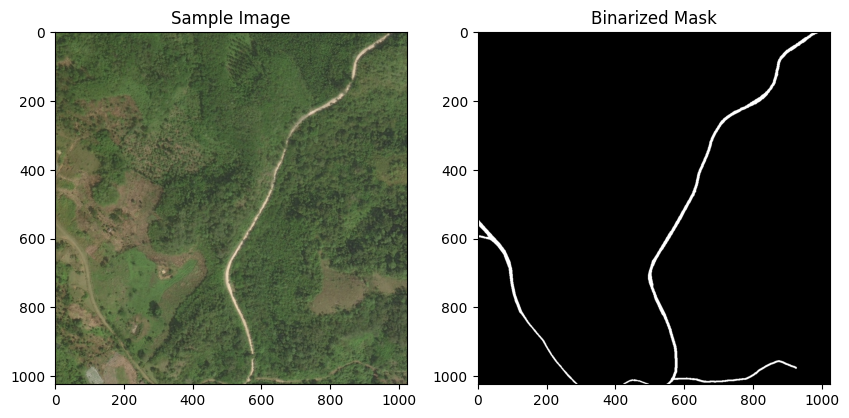

In [19]:
import pandas as pd
import os
import cv2
from PIL import Image
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random

# Set the dataset root folder and folder name
dataset_root_folder = "/content/drive/MyDrive/Satellite_Data"
dataset_folder_name = "DataSet"

# Get the file paths for the dataset
dataset_file_path = os.walk(os.path.join(dataset_root_folder, dataset_folder_name))

# Initialize lists for storing images and masks
image_dataset = []
mask_dataset = []

# Counters and limits for images and masks
image_count = 0
mask_count = 0
image_max_count = 7000
mask_max_count = 7000

# Iterate over the file paths in the dataset
for path, subdirs, files in dataset_file_path:
    dir_name = path.split(os.path.sep)[-1]

    if dir_name == "train_data":
        all_images = os.listdir(path)
        jpg_images = sorted([file for file in all_images if file.lower().endswith((".jpg", ".jpeg"))])
        png_images = sorted([file for file in all_images if file.lower().endswith(".png")])

        # Load and store images
        for i, image_name in enumerate(jpg_images):
            if i >= image_max_count:
                break
            image = cv2.imread(os.path.join(path, image_name))
            image_dataset.append(image)
            image_count += 1

        # Load, binarize, and store masks
        for i, image_name in enumerate(png_images):
            if i >= mask_max_count:
                break
            mask = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
            _, binarized_mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
            mask_dataset.append(binarized_mask)
            mask_count += 1

# Optionally, display the first image and its corresponding mask
if image_dataset and mask_dataset:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_dataset[0], cv2.COLOR_BGR2RGB))
    plt.title("Sample Image")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_dataset[0], cmap="gray")
    plt.title("Binarized Mask")

    plt.show()


Sample normalized image:


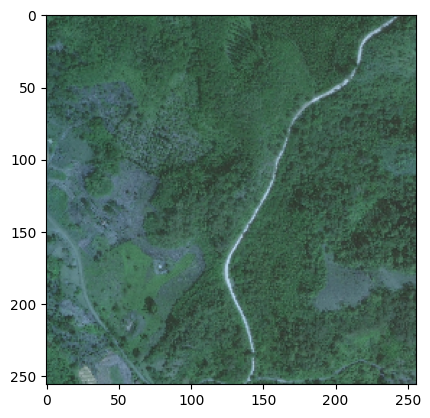

Sample processed mask:


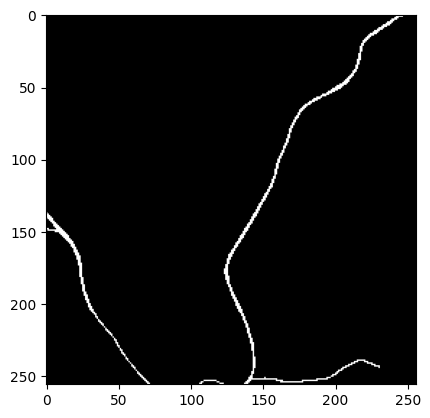

Training data shape: (6226, 256, 256, 3)
Training mask shape: (6226, 256, 256, 2)


In [20]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Function to resize images
def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size)

# Normalize images to range [0, 1]
def normalize_image(image):
    return image / 255.0

# Binarize mask
def binarize_mask(mask, threshold=128):
    _, binarized = cv2.threshold(mask, threshold, 255, cv2.THRESH_BINARY)
    binarized = binarized // 255  # Scale to [0, 1]
    return binarized

# Resize and normalize images and masks
resized_images = [resize_image(img) for img in image_dataset]
normalized_images = [normalize_image(img) for img in resized_images]
resized_masks = [resize_image(mask) for mask in mask_dataset]
binarized_masks = [binarize_mask(mask) for mask in resized_masks]
processed_masks = [to_categorical(mask, num_classes=2) for mask in binarized_masks]

# Convert lists to numpy arrays
X_train = np.array(normalized_images)
y_train = np.array(processed_masks)

print("Sample normalized image:")
plt.imshow(X_train[0])
plt.show()

print("Sample processed mask:")
plt.imshow(y_train[0][:, :, 1], cmap="gray")
plt.show()

print(f"Training data shape: {X_train.shape}")
print(f"Training mask shape: {y_train.shape}")

In [21]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(2, 1, activation='softmax')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = unet_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import cv2
import matplotlib.pyplot as plt

# Function to resize images
def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size)

# Normalize images to range [0, 1]
def normalize_image(image):
    return image / 255.0

# Convert masks to categorical
def preprocess_mask(mask):
    return to_categorical(mask, num_classes=2)

# Sample image and mask datasets (Replace these with actual datasets)
image_dataset = [np.random.randint(0, 256, (1024, 1024, 3), dtype=np.uint8) for _ in range(7000)]
mask_dataset = [np.random.randint(0, 2, (1024, 1024), dtype=np.uint8) for _ in range(7000)]

# Resize and normalize images and masks
resized_images = [resize_image(img) for img in image_dataset]
normalized_images = [normalize_image(img) for img in resized_images]
resized_masks = [resize_image(mask) for mask in mask_dataset]
processed_masks = [preprocess_mask(mask) for mask in resized_masks]

# Convert lists to numpy arrays
X_train = np.array(normalized_images)
y_train = np.array(processed_masks)

# Verify the shapes of the datasets before splitting
print("Shape of normalized_images:", X_train.shape)
print("Shape of processed_masks:", y_train.shape)

# Check if there are enough data points
if len(X_train) <= 1243 or len(y_train) <= 1243:
    raise ValueError("Not enough data points in X_train or y_train to split into training and validation sets.")

# Split data into training and validation sets
X_val = X_train[:1243]
y_val = y_train[:1243]
X_train = X_train[1243:]
y_train = y_train[1243:]

# Verify the shapes of the datasets after split
print("Shape of X_train after split:", X_train.shape)
print("Shape of y_train after split:", y_train.shape)
print("Shape of X_val after split:", X_val.shape)
print("Shape of y_val after split:", y_val.shape)

# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = tf.keras.layers.Input(input_size)

    # Encoder
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = tf.keras.layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = tf.keras.layers.concatenate([up6, conv4])
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = tf.keras.layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = tf.keras.layers.concatenate([up7, conv3])
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = tf.keras.layers.concatenate([up8, conv2])
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = tf.keras.layers.concatenate([up9, conv1])
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = tf.keras.layers.Conv2D(2, 1, activation='softmax')(conv9)

    model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create and summarize the model
model = unet_model()
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Print training history
print("Training history:", history.history)


Shape of normalized_images: (1300, 256, 256, 3)
Shape of processed_masks: (1300, 256, 256, 2)
Shape of X_train after split: (57, 256, 256, 3)
Shape of y_train after split: (57, 256, 256, 2)
Shape of X_val after split: (1243, 256, 256, 3)
Shape of y_val after split: (1243, 256, 256, 2)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_19[0][0]']           
    

In [23]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


39/39 [==============================] - 93s 2s/step - loss: 0.6212 - accuracy: 0.6876
Validation Loss: 0.6212316751480103
Validation Accuracy: 0.6875737309455872


39/39 [==============================] - 93s 2s/step


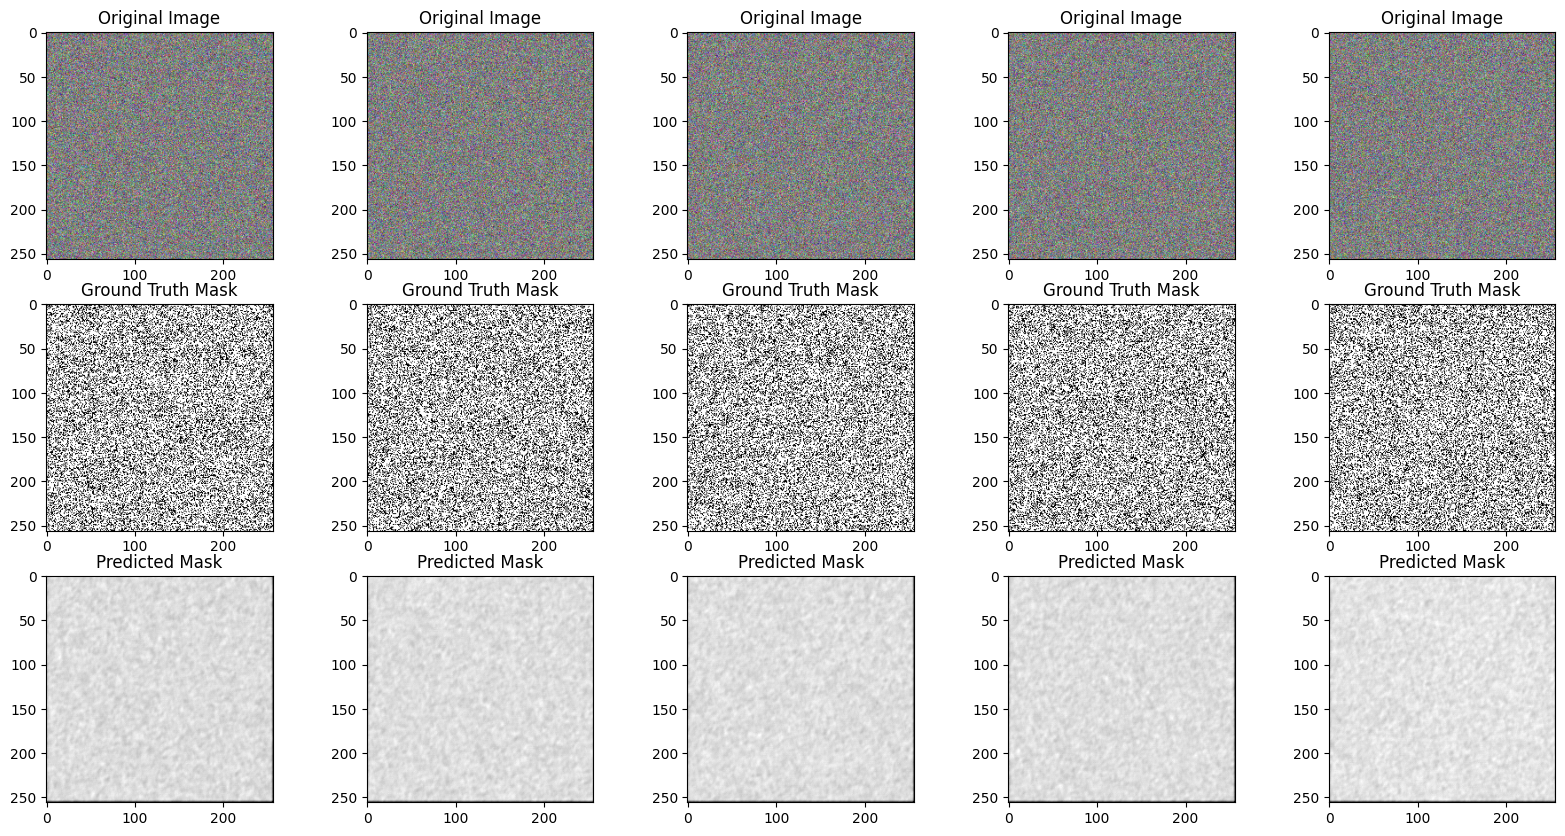

In [24]:
# Make predictions on validation data
preds = model.predict(X_val)

# Visualize predictions
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(X_val[i])
    plt.title("Original Image")

    plt.subplot(3, n, i + 1 + n)
    plt.imshow(y_val[i][:, :, 1], cmap="gray")
    plt.title("Ground Truth Mask")

    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(preds[i][:, :, 1], cmap="gray")
    plt.title("Predicted Mask")
plt.show()
